**Homework 4 - Hamming Distance Expectation**
02-250, Spring 2021

The goal of this recitation is to explore the distribution of p-values and practice testing biological expectation by generating random sequence examples.

In [ ]:
#If you are on google collab, then install the biopython packages to this system
#The code for installing biopython comes from:
#https://colab.research.google.com/github/chris-rands/biopython-coronavirus/blob/master/biopython-coronavirus-notebook.ipynb#scrollTo=w5rnDvKdukEo
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%!
cd /content/drive/MyDrive/CMPBIO250
cd HW4

[]

In [ ]:
#Import the biopython and system libraries
import math
import scipy.stats as ss
import numpy as np
from numpy import random

import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
################################################
# Question 4a - Generate a random sequence of nucleotides       #
################################################

##### Function to generate sequence of length x (unbiased) ######

def createSeq(seqLen):
	seq = [random.choice(["A","C","G","T"]) for _ in range(seqLen)];
	#str(x);
	return "".join(seq);

createSeq(10)


'GAGCTTGTGT'

In [ ]:
##### Function to generate sequence of length x (biased) - template ######
#Nuc prob (A,C,G,T)
import random
def createSeqGc(seqLen,nucProbA,nucProbC,nucProbG,nucProbT):
  seq = ""
  nuc_list = ["A","C","G","T"]
  seq = random.choices(nuc_list, weights = (nucProbA,nucProbC,nucProbG,nucProbT), k = seqLen)
  return "".join(seq)

print(createSeqGc(4,0.1,0.1,0.1,0.7))

TCTT


In [ ]:
################################################
# Question 4b - Calculate the hamming distance between two random sequences    #
################################################

In [ ]:
####### Function to compute hamming distance ##########

def hamming(seq1,seq2) :
	x = 0;
	for curPos in range(len(seq1)) :
		if seq1[curPos] != seq2[curPos] :
			x = x + 1;
	return x;

hamming("ATCG","ATCG")
hamming("ATCG","GAAA")

####### Calculate hamming distance between two random sequences ##########


#Generate the sequence for for Saccharomyces cerevisiae
seq1 = createSeqGc(100,0.1395,0.3605,0.1395,0.3605)
#Generate the sequence for Streptomyces coelicolor
seq2 = createSeqGc(100,0.3076,0.1924,0.3076,0.1924)
#Print the hamming distance between the two

print("Hamming distance:", hamming(seq1,seq2))


Hamming distance: 72


Text(0.5, 1.0, 'Saccharomyces cerevisiae')

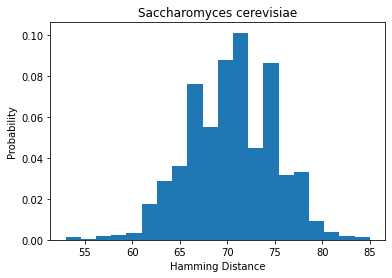

In [ ]:
################################################
# Question 4c - Calculate the hamming distance between two random sequences 1000 times with different nucleotide biases    #
################################################
#Sequence length 100

##### Calculate hamming for Saccharomyces cerevisiae sequences ######
nSeqs = 1000;
seqLen = 100;


#Saccharomyces cerevisiae
ham_list_sac = []
for i in range(nSeqs):
  ham_list_sac.append(hamming(createSeqGc(seqLen,0.1395,0.3605,0.1395,0.3605),createSeqGc(seqLen,0.1395,0.3605,0.1395,0.3605)))


### Plot #####

numBins = 20; #Use 20 as the number of bins for the histogram

plt.hist(ham_list_sac, density=True, bins=numBins)
plt.ylabel('Probability')
plt.xlabel('Hamming Distance');
plt.title('Saccharomyces cerevisiae')

Text(0.5, 1.0, 'Streptomyces coelicolor')

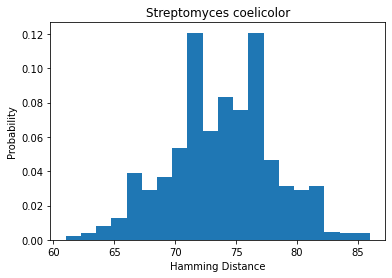

In [ ]:


nSeqs = 1000;
seqLen = 100;

#Streptomyces coelicolor
ham_list_strep = []
for i in range(nSeqs):
  ham_list_strep.append(hamming(createSeqGc(seqLen,0.3076,0.1924,0.3076,0.1924),createSeqGc(seqLen,0.3076,0.1924,0.3076,0.1924)))



# We can set the number of bins with the `bins` kwarg
plt.hist(ham_list_strep, density=True, bins=numBins)
plt.ylabel('Probability')
plt.xlabel('Hamming Distance');
plt.title('Streptomyces coelicolor')

